In [1]:
from matplotlib import pyplot as plt
from pylab import *
import numpy as np
import seaborn as sns
import scipy as sp
import pandas as pd
sys.path.insert(0, '/Users/haly/idefix/pytools')
from vtk_io import *
pi = 3.14






In [3]:
def read_and_plot_gas(directory,Nx,Nz,snapshot,axs,fig):
    file    = directory + "/data."+ "{:04d}".format(snapshot) + ".vtk"
    d = readVTK(file, geometry='cartesian')
    rho_g = d.data.get("RHO")
    vx_g = d.data.get("VX1")
    vy_g = d.data.get("VX2")
    vz_g = d.data.get("VX3")
    rho_g = rho_g.reshape(Nx,Nz)
    vx_g = vx_g.reshape(Nx,Nz)
    vy_g = vy_g.reshape(Nx,Nz)
    vz_g = vz_g.reshape(Nx,Nz)
    print(np.max(rho_g))
    print(np.float64(np.min(rho_g)))

    im1 = axs[0][0].imshow(rho_g.T,origin='lower',norm="linear",cmap="mako", aspect='auto')
    fig.colorbar(im1)

    im2 = axs[0][1].imshow(vx_g.T,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im2)


    im3 = axs[1][0].imshow(vy_g.T-np.tile(d.x,(Nz,1))*-1.5,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im3)

    im4 = axs[1][1].imshow(vz_g.T,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im4)

    axs[0][0].set_title(r'$\rho_g$')
    axs[0][1].set_title(r'$V_x$')
    axs[1][0].set_title(r'$V_y$')
    axs[1][1].set_title(r'$V_z$')


def read_and_plot_dust(directory,Nx,Nz,snapshot,axs,fig):
    file    = directory + "/data."+ "{:04d}".format(snapshot) + ".vtk"
    d = readVTK(file, geometry='cartesian')
    rho_d = d.data.get("Dust0_RHO")
    vx_d = d.data.get("Dust0_VX1")
    vy_d = d.data.get("Dust0_VX2")
    vz_d = d.data.get("Dust0_VX3")
    rho_d = rho_d.reshape(Nx,Nz)
    vx_d = vx_d.reshape(Nx,Nz)
    vy_d = vy_d.reshape(Nx,Nz)
    vz_d = vz_d.reshape(Nx,Nz)
    print(np.max(rho_d))
    print(np.min(rho_d))
    im1 = axs[0][0].imshow(rho_d.T,origin='lower',norm="log",cmap="mako", aspect='auto', vmin=0.01)
    fig.colorbar(im1)
    im2 = axs[0][1].imshow(vx_d.T,origin='lower',norm="linear",cmap="seismic", aspect='auto', vmin=-0.4, vmax=0.4)
    fig.colorbar(im2)
    im3 = axs[1][0].imshow(vy_d.T-np.tile(d.x,(Nz,1))*-1.5,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im3)
    im4 = axs[1][1].imshow(vz_d.T,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im4)
    axs[0][0].set_title(r'$\rho_d$')
    axs[0][1].set_title(r'$V_x$')
    axs[1][0].set_title(r'$V_y$')
    axs[1][1].set_title(r'$V_z$')

def read_history(directory):
    f = open(directory, 'r')
    time =  []
    rho_max = []

    for line in f:
        line = line.strip()
        columns = line.split()
        time.append(float(columns[0])) 
        rho_max.append(float(columns[1]))
    f.close()
    return time, rho_max


def read_and_plot_gas_FairbairnStone_3D_slice(directory,Nx,Ny,Nz,slice,snapshot,axs,fig):
    file    = directory + "/data."+ "{:04d}".format(snapshot) + ".vtk"
    d = readVTK(file, geometry='cartesian')
    rho_g = d.data.get("RHO")
    vx_g = d.data.get("VX1")
    vy_g = d.data.get("VX2")
    vz_g = d.data.get("VX3")
    rho_g = rho_g.reshape(Nx,Ny,Nz)
    vx_g = vx_g.reshape(Nx,Ny,Nz)
    vy_g = vy_g.reshape(Nx,Ny,Nz)
    vz_g = vz_g.reshape(Nx,Ny,Nz)
    print(np.max(rho_g))
    print(np.float64(np.min(rho_g)))

    im1 = axs[0].imshow(rho_g[:,slice,:].T,origin='lower',norm="linear",cmap="mako", aspect='auto')
    fig.colorbar(im1)

    im2 = axs[1].imshow(vx_g[:,slice,:].T,origin='lower',norm="linear",cmap="seismic", aspect='auto', vmin=-0.2, vmax=0.2)
    fig.colorbar(im2)


    im3 = axs[2].imshow(vy_g[:,slice,:].T-np.tile(d.x,(Nz,1))*-1.5,origin='lower',norm="linear",cmap="seismic", aspect='auto', vmin=-0.2, vmax=0.2)
    fig.colorbar(im3)

    im4 = axs[3].imshow(vz_g[:,slice,:].T,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im4)

    axs[0].set_title(r'$\rho_g$')
    axs[1].set_title(r'$V_x$')
    axs[2].set_title(r'$V_y$')
    axs[3].set_title(r'$V_z$')

def read_and_plot_gas_FairbairnStone_3D_integrated_in_y(directory,Nx,Ny,Nz,snapshot,axs,fig):
    file    = directory + "/data."+ "{:04d}".format(snapshot) + ".vtk"
    d = readVTK(file, geometry='cartesian')
    rho_g = d.data.get("RHO")
    vx_g = d.data.get("VX1")
    vy_g = d.data.get("VX2")
    vz_g = d.data.get("VX3")
    rho_g = rho_g.reshape(Nx,Ny,Nz)
    vx_g = vx_g.reshape(Nx,Ny,Nz)
    vy_g = vy_g.reshape(Nx,Ny,Nz)
    vz_g = vz_g.reshape(Nx,Ny,Nz)
    print(np.max(rho_g))
    print(np.float64(np.min(rho_g)))

    rho_sum = vx_sum = vy_sum = vz_sum = zeros((Nz,Nx))

    for i in range(0,Ny):
        rho_sum = rho_sum + rho_g[:,i,:].T
        vx_sum = vx_sum + rho_g[:,i,:].T*vx_g[:,i,:].T
        vy_sum = vy_sum + rho_g[:,i,:].T*vy_g[:,i,:].T
        vz_sum = vz_sum + rho_g[:,i,:].T*vz_g[:,i,:].T

    im1 = axs[0].imshow(rho_sum/Ny,origin='lower',norm="linear",cmap="mako", aspect='auto')
    fig.colorbar(im1)

    im2 = axs[1].imshow(vx_sum/rho_sum,origin='lower',norm="linear",cmap="seismic", aspect='auto', vmin=-0.2, vmax=0.2)
    fig.colorbar(im2)


    im3 = axs[2].imshow(vy_sum/rho_sum-np.tile(d.x,(Nz,1))*-1.5,origin='lower',norm="linear",cmap="seismic", aspect='auto', vmin=-0.2, vmax=0.2)
    fig.colorbar(im3)

    im4 = axs[3].imshow(vz_sum/rho_sum,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im4)

    axs[0].set_title(r'$\rho_g$')
    axs[1].set_title(r'$V_x$')
    axs[2].set_title(r'$V_y$')
    axs[3].set_title(r'$V_z$')

def read_and_plot_gas_FairbairnStone_3D_integrated_in_xy(directory,Nx,Ny,Nz,snapshot,axs,fig, colour):
    file    = directory + "/data."+ "{:04d}".format(snapshot) + ".vtk"
    d = readVTK(file, geometry='cartesian')
    rho_g = d.data.get("RHO")
    vx_g = d.data.get("VX1")
    vy_g = d.data.get("VX2")
    vz_g = d.data.get("VX3")
    rho_g = rho_g.reshape(Nx,Ny,Nz)
    vx_g = vx_g.reshape(Nx,Ny,Nz)
    vy_g = vy_g.reshape(Nx,Ny,Nz)
    vz_g = vz_g.reshape(Nx,Ny,Nz)
    print(np.max(rho_g))
    print(np.float64(np.min(rho_g)))

    rho_sum_xy = vx_sum_xy = vy_sum_xy = vz_sum_xy = zeros((Nz))
    rho_sum_y = vx_sum_y = vy_sum_y = vz_sum_y = zeros((Nz,Nx))

    for i in range(0,Ny):
        rho_sum_y = rho_sum_y + rho_g[:,i,:].T
        vx_sum_y = vx_sum_y + rho_g[:,i,:].T*vx_g[:,i,:].T
        vy_sum_y = vy_sum_y + rho_g[:,i,:].T*vy_g[:,i,:].T
        vz_sum_y = vz_sum_y + rho_g[:,i,:].T*vz_g[:,i,:].T

    vx_sum_y = vx_sum_y/rho_sum_y
    vy_sum_y = vy_sum_y/rho_sum_y
    vy_sum_y = vy_sum_y - np.tile(d.x,(Nz,1))*-1.5


    for i in range(0,Nx):
        rho_sum_xy = rho_sum_xy + rho_sum_y[:,i]
        vx_sum_xy = vx_sum_xy + rho_sum_y[:,i]*vx_sum_y[:,i]
        vy_sum_xy = vy_sum_xy + rho_sum_y[:,i]*vy_sum_y[:,i]
        vz_sum_xy = vz_sum_xy + rho_sum_y[:,i]*vz_sum_y[:,i]

    
    im1 = axs[0].plot(vx_sum_xy/rho_sum_xy,d.z,color=colour)
    im2 = axs[1].plot(vy_sum_xy/rho_sum_xy,d.z,color=colour)

    axs[0].set_title(r'$V_x$')
    axs[1].set_title(r'$V_y$')

def read_and_plot_dust_FairbairnStone_3D_slice(directory,Nx,Ny,Nz,slice,snapshot,axs,fig):
    file    = directory + "/data."+ "{:04d}".format(snapshot) + ".vtk"
    d = readVTK(file, geometry='cartesian')
    rho_d = d.data.get("Dust0_RHO")
    vx_d = d.data.get("Dust0_VX1")
    vy_d = d.data.get("Dust0_VX2")
    vz_d = d.data.get("Dust0_VX3")
    rho_d = rho_d.reshape(Nx,Ny,Nz)
    vx_d = vx_d.reshape(Nx,Ny,Nz)
    vy_d = vy_d.reshape(Nx,Ny,Nz)
    vz_d = vz_d.reshape(Nx,Ny,Nz)
    print(np.max(rho_d))
    print(np.float64(np.min(rho_d)))

    im1 = axs[0].imshow(rho_d[:,slice,:].T,origin='lower',norm="log",cmap="mako", aspect='auto', vmin=0.01)
    fig.colorbar(im1)

    im2 = axs[1].imshow(vx_d[:,slice,:].T,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im2)


    im3 = axs[2].imshow(vy_d[:,slice,:].T-np.tile(d.x,(Nz,1))*-1.5,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im3)

    im4 = axs[3].imshow(vz_d[:,slice,:].T,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im4)

    axs[0].set_title(r'$\rho_d$')
    axs[1].set_title(r'$V_x$')
    axs[2].set_title(r'$V_y$')
    axs[3].set_title(r'$V_z$')

def read_and_plot_dust_FairbairnStone_3D_integrated_in_y(directory,Nx,Ny,Nz,snapshot,axs,fig):
    file    = directory + "/data."+ "{:04d}".format(snapshot) + ".vtk"
    d = readVTK(file, geometry='cartesian')
    rho_d = d.data.get("Dust0_RHO")
    vx_d = d.data.get("Dust0_VX1")
    vy_d = d.data.get("Dust0_VX2")
    vz_d = d.data.get("Dust0_VX3")
    rho_d = rho_d.reshape(Nx,Ny,Nz)
    vx_d = vx_d.reshape(Nx,Ny,Nz)
    vy_d = vy_d.reshape(Nx,Ny,Nz)
    vz_d = vz_d.reshape(Nx,Ny,Nz)
    print(np.max(rho_d))
    print(np.float64(np.min(rho_d)))

    rho_sum = vx_sum = vy_sum = vz_sum = zeros((Nz,Nx))

    for i in range(0,Ny):
        rho_sum = rho_sum + rho_d[:,i,:].T
        vx_sum = vx_sum + rho_d[:,i,:].T*vx_d[:,i,:].T
        vy_sum = vy_sum + rho_d[:,i,:].T*vy_d[:,i,:].T
        vz_sum = vz_sum + rho_d[:,i,:].T*vz_d[:,i,:].T

    im1 = axs[0].imshow(rho_sum/Ny,origin='lower',norm="log",cmap="mako", aspect='auto', vmin=0.01)
    fig.colorbar(im1)

    im2 = axs[1].imshow(vx_sum/rho_sum,origin='lower',norm="linear",cmap="seismic", aspect='auto', vmin=-0.2, vmax=0.2)
    fig.colorbar(im2)


    im3 = axs[2].imshow(vy_sum/rho_sum-np.tile(d.x,(Nz,1))*-1.5,origin='lower',norm="linear",cmap="seismic", aspect='auto', vmin=-0.2, vmax=0.2)
    fig.colorbar(im3)

    im4 = axs[3].imshow(vz_sum/rho_sum,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im4)

    axs[0].set_title(r'$\rho_d$')
    axs[1].set_title(r'$V_x$')
    axs[2].set_title(r'$V_y$')
    axs[3].set_title(r'$V_z$')


def read_and_plot_dust_FairbairnStone_3D_integrated_in_z(directory,Nx,Ny,Nz,snapshot,axs,fig):
    file    = directory + "/data."+ "{:04d}".format(snapshot) + ".vtk"
    d = readVTK(file, geometry='cartesian')
    rho_d = d.data.get("Dust0_RHO")
    vx_d = d.data.get("Dust0_VX1")
    vy_d = d.data.get("Dust0_VX2")
    vz_d = d.data.get("Dust0_VX3")
    rho_d = rho_d.reshape(Nx,Ny,Nz)
    vx_d = vx_d.reshape(Nx,Ny,Nz)
    vy_d = vy_d.reshape(Nx,Ny,Nz)
    vz_d = vz_d.reshape(Nx,Ny,Nz)
    print(np.max(rho_d))
    print(np.float64(np.min(rho_d)))

    rho_sum = vx_sum = vy_sum = vz_sum = zeros((Ny,Nx))

    for i in range(0,Nz):
        rho_sum = rho_sum + rho_d[:,:,i].T
        vx_sum = vx_sum + rho_d[:,:,i].T*vx_d[:,:,i].T
        vy_sum = vy_sum + rho_d[:,:,i].T*vy_d[:,:,i].T
        vz_sum = vz_sum + rho_d[:,:,i].T*vz_d[:,:,i].T

    im1 = axs[0].imshow(rho_sum/Nz,origin='lower',norm="log",cmap="mako", aspect='auto', vmin=0.01)
    fig.colorbar(im1)

    im2 = axs[1].imshow(vx_sum/rho_sum,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im2)


    im3 = axs[2].imshow(vy_sum/rho_sum-np.tile(d.x,(Ny,1))*-1.5,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im3)

    im4 = axs[3].imshow(vz_sum/rho_sum,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im4)

    axs[0].set_title(r'$\rho_d$')
    axs[1].set_title(r'$V_x$')
    axs[2].set_title(r'$V_y$')
    axs[3].set_title(r'$V_z$')


def read_and_plot_gas_FairbairnStone(directory,Nx,Nz,snapshot,axs,fig):
    file    = directory + "/data."+ "{:04d}".format(snapshot) + ".vtk"
    d = readVTK(file, geometry='cartesian')
    rho_g = d.data.get("RHO")
    vx_g = d.data.get("VX1")
    vy_g = d.data.get("VX2")
    vz_g = d.data.get("VX3")
    rho_g = rho_g.reshape(Nx,Nz)
    vx_g = vx_g.reshape(Nx,Nz)
    vy_g = vy_g.reshape(Nx,Nz)
    vz_g = vz_g.reshape(Nx,Nz)
    print(np.max(rho_g))
    print(np.float64(np.min(rho_g)))

    im1 = axs[0].imshow(rho_g.T,origin='lower',norm="linear",cmap="mako", aspect='auto')
    fig.colorbar(im1)

    im2 = axs[1].imshow(vx_g.T,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im2)


    im3 = axs[2].imshow(vy_g.T-np.tile(d.x,(Nz,1))*-1.5,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im3)

    im4 = axs[3].imshow(vz_g.T,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im4)

    axs[0].set_title(r'$\rho_g$')
    axs[1].set_title(r'$V_x$')
    axs[2].set_title(r'$V_y$')
    axs[3].set_title(r'$V_z$')


def read_and_plot_dust_FairbairnStone(directory,Nx,Nz,snapshot,axs,fig):
    file    = directory + "/data."+ "{:04d}".format(snapshot) + ".vtk"
    d = readVTK(file, geometry='cartesian')
    rho_d = d.data.get("Dust0_RHO")
    vx_d = d.data.get("Dust0_VX1")
    vy_d = d.data.get("Dust0_VX2")
    vz_d = d.data.get("Dust0_VX3")
    rho_d = rho_d.reshape(Nx,Nz)
    vx_d = vx_d.reshape(Nx,Nz)
    vy_d = vy_d.reshape(Nx,Nz)
    vz_d = vz_d.reshape(Nx,Nz)
    print(np.max(rho_d))
    print(np.min(rho_d))
    im1 = axs[0].imshow(rho_d.T,origin='lower',norm="log",cmap="mako", aspect='auto')
    fig.colorbar(im1)
    im2 = axs[1].imshow(vx_d.T,origin='lower',norm="linear",cmap="seismic", aspect='auto', vmin=-0.4, vmax=0.4)
    fig.colorbar(im2)
    im3 = axs[2].imshow(vy_d.T-np.tile(d.x,(Nz,1))*-1.5,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im3)
    im4 = axs[3].imshow(vz_d.T,origin='lower',norm="linear",cmap="seismic", aspect='auto')
    fig.colorbar(im4)
    axs[0].set_title(r'$\rho_d$')
    axs[1].set_title(r'$V_x$')
    axs[2].set_title(r'$V_y$')
    axs[3].set_title(r'$V_z$')

0.99547994
0.9950554370880127


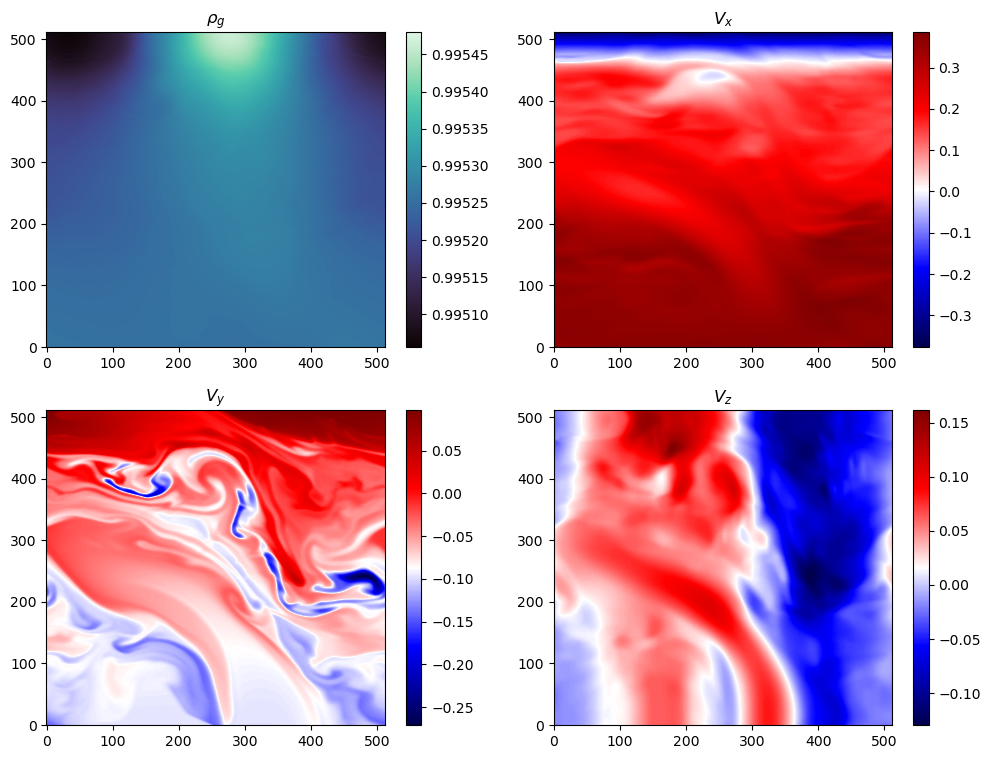

In [107]:
plt.rcParams["figure.figsize"] = (12,9)
fig, axs = plt.subplots(2,2)

#directory = "/Users/haly/science/projects/local_warp/shear/gas_NR"
#directory = "/Users/haly/science/projects/local_warp/shear"
#directory = "/Users/haly/science/projects/local_warp/shear_corrected"
#directory = "/Users/haly/science/projects/local_warp/shear_corrected/no_feedback"
#directory = "/Users/haly/science/projects/local_warp/shear_corrected/no_feedback_no_gas_pert"

#directory = "/Users/haly/science/projects/local_warp/no_shear_x"

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear/dust_f0.2_st1"

snapshot = 476
Nx = Nz = 512

read_and_plot_gas(directory,Nx,Nz,snapshot,axs,fig)



58.592392
8.431297e-09


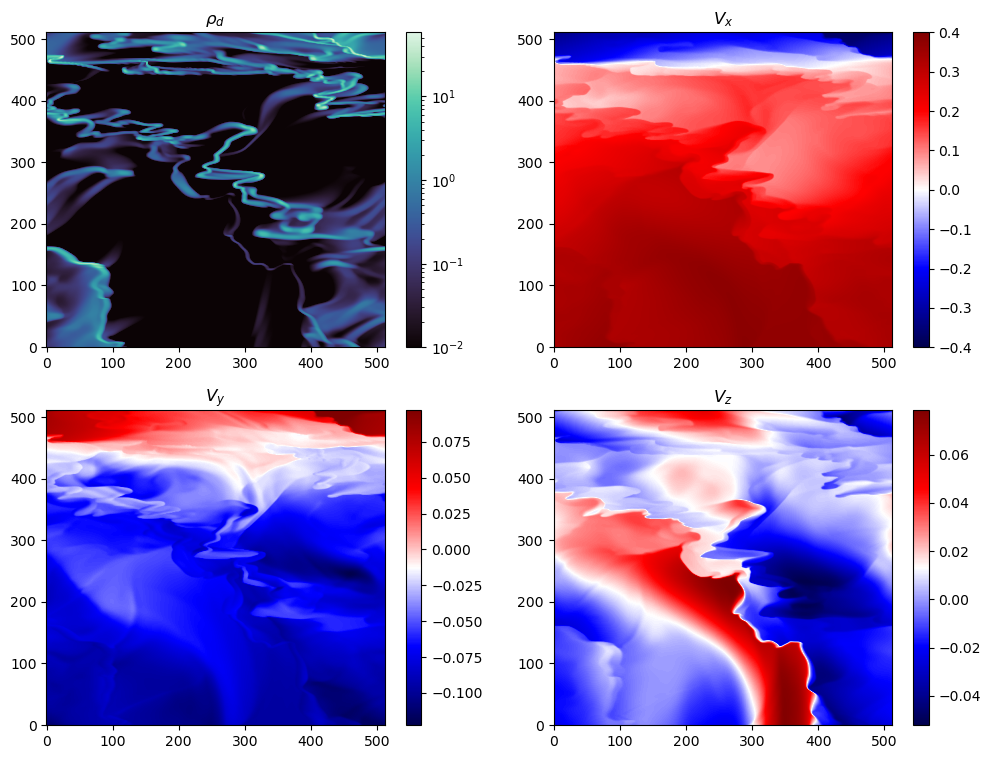

In [108]:
plt.rcParams["figure.figsize"] = (12,9)
fig, axs = plt.subplots(2,2)

#directory = "/Users/haly/science/projects/local_warp/shear/BA_128_no_feedback"
#directory = "/Users/haly/science/projects/local_warp/shear"
#directory = "/Users/haly/science/projects/local_warp/shear_corrected"
#directory = "/Users/haly/science/projects/local_warp/shear_corrected/no_feedback"
#directory = "/Users/haly/science/projects/local_warp/shear_corrected/no_feedback_no_gas_pert"

#directory = "/Users/haly/science/projects/local_warp/no_shear_x"
#directory = "/Users/haly/science/projects/local_warp/Fairbairn&Stone"

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear/dust_f0.2_st1"
snapshot = 476
Nx = Nz = 512

read_and_plot_dust(directory,Nx,Nz,snapshot,axs,fig)




In [226]:
plt.rcParams["figure.figsize"] = (12,9)

#directory = "/Users/haly/science/projects/local_warp/shear"
directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear/dust_f0.2_st1"
Nx = Nz = 512

with plt.ioff():
    for i in range(0,529):
        fig, axs = plt.subplots(2,2)
        im = read_and_plot_gas(directory,Nx,Nz,i,axs,fig)
        plt.savefig('new_image_'+"{:04d}".format(i)+".png") 
        plt.close()


1.0
1.0
1.0000007
0.9999997019767761
1.0000006
0.9999998211860657
1.0000007
1.0000001192092896
1.0000007
1.0000003576278687
1.0000008
1.0000005960464478
1.0000011
1.0000008344650269
1.0000013
1.0000011920928955
1.0000017
1.0000015497207642
1.0000021
1.0000019073486328
1.0000025
1.000002384185791
1.000003
1.0000028610229492
1.0000033
1.0000032186508179
1.0000037
1.0000035762786865
1.0000039
1.0000038146972656
1.0000042
1.0000040531158447
1.0000043
1.0000041723251343
1.0000044
1.0000042915344238
1.0000045
1.0000044107437134
1.0000046
1.000004529953003
1.0000048
1.0000046491622925
1.0000049
1.000004768371582
1.0000049
1.000004768371582
1.000005
1.000004768371582
1.000005
1.000004768371582
1.000005
1.000004768371582
1.000005
1.0000048875808716
1.000005
1.0000048875808716
1.0000048
1.000004768371582
1.0000045
1.0000044107437134
1.0000043
1.0000041723251343
1.000004
1.0000039339065552
1.0000039
1.0000038146972656
1.0000038
1.000003695487976
1.000004
1.0000039339065552
1.0000042
1.00000393390

(0.0, 10.0)

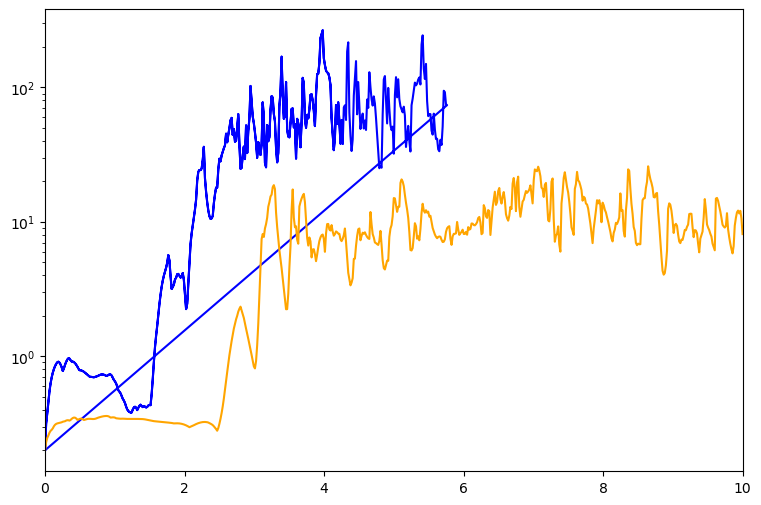

In [101]:
#directory = "/Users/haly/science/projects/local_warp/shear"
directory = ["/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear/dust_f0.2_st1",
             "/Users/haly/science/projects/local_warp/shear_corrected"]

colours = ["blue","orange"]

plt.rcParams["figure.figsize"] = (9,6)
fig,ax = plt.subplots(1,1)
for i in range(0,2):
    time, dens_dust = read_history(directory[i]+"/timevol.dat")
    ax.plot(np.multiply(time[::1],1./2./pi),dens_dust[::1],color=colours[i])
#ax.plot(np.linspace(0,22,225),np.array(rho_max),color='purple')
ax.set_yscale('log')
ax.set_xlim(0,10)


(0.0, 10.0)

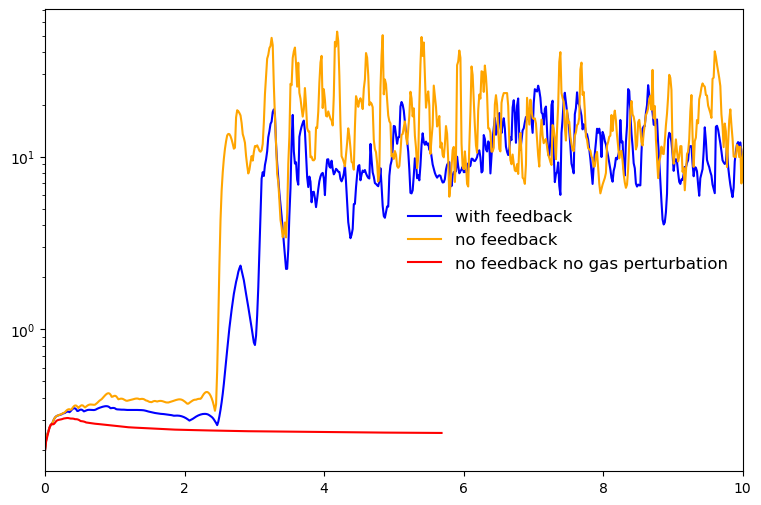

In [48]:
plt.rcParams["figure.figsize"] = (9,6)
fig,ax = plt.subplots(1,1)

#directory = "/Users/haly/science/projects/local_warp/shear/BA_128_with_feedback"
directory = "/Users/haly/science/projects/local_warp/shear_corrected"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear/dust_f0.2_st1"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="blue", label="with feedback")


#directory = "/Users/haly/science/projects/local_warp/shear/BA_128_no_feedback"
directory = "/Users/haly/science/projects/local_warp/shear_corrected/no_feedback"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear/dust_f0.2_st1"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="orange", label = "no feedback")


directory = "/Users/haly/science/projects/local_warp/shear_corrected/no_feedback_no_gas_pert"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="red", label = "no feedback no gas perturbation")


ax.legend( loc='best', frameon=False, fontsize=12)

ax.set_yscale('log')
ax.set_xlim(0,10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


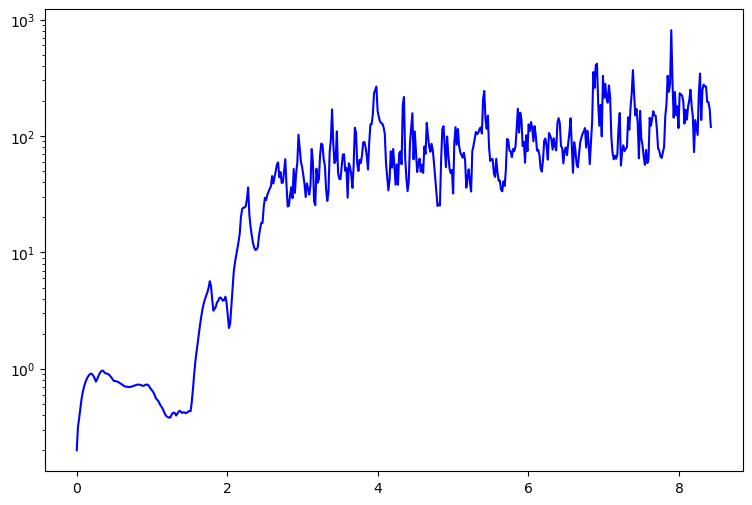

In [230]:
plt.rcParams["figure.figsize"] = (9,6)
fig,ax = plt.subplots(1,1)

#directory = "/Users/haly/science/projects/local_warp/shear_corrected"
directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear/dust_f0.2_st1"


time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="blue")




ax.legend( loc='best', frameon=False, fontsize=12)

ax.set_yscale('log')
#ax.set_xlim(0,10)

# 2 fluid equations

\begin{equation}
\frac{\partial \mathbf{u}_g}{\partial t}+\mathbf{u}_g \cdot \nabla \mathbf{u}_g + 2\mathbf{\Omega} \times \mathbf{u}_g = 2 \Omega S x \mathbf{\hat{x}} - \frac{\nabla P}{\rho_g} + \frac{\rho_d}{\rho_g}\frac{\mathbf{u}_d-\mathbf{u}_g}{t_s} + F_w \mathbf{\hat{x}}
\end{equation}

\begin{equation}
\frac{\partial \mathbf{u}_d}{\partial t}+\mathbf{u}_d \cdot \nabla \mathbf{u}_d + 2\mathbf{\Omega} \times \mathbf{u}_d = 2 \Omega S x \mathbf{\hat{x}} + \frac{\mathbf{u}_d-\mathbf{u}_g}{t_s} 
\end{equation}

\begin{align}
&u_g = u_{b,g} \Omega z\\
&v_g = v_{b,g} \Omega z - S x\\
&u_d = u_{b,d} \Omega z\\
&v_d = v_{b,d} \Omega z - S x
\end{align}

\begin{equation}
\frac{\partial u_{b,g}}{\partial t} - 2 \Omega v_{b,g} = \frac{f}{t_s}(u_{b,d}-u_{b,g})+\psi \Omega e^{i\Omega t}
\end{equation}

\begin{equation}
\frac{\partial v_{b,g}}{\partial t} + \frac{\kappa^2}{2\Omega}u_{b,g} = \frac{f}{t_s} (v_{b,d}-v_{b,g})
\end{equation}

\begin{equation}
\frac{\partial u_{b,d}}{\partial t} - 2 \Omega v_{b,d} = -\frac{1}{t_s} (u_{b,d}-u_{b,g})
\end{equation}

\begin{equation}
\frac{\partial v_{b,d}}{\partial t} + \frac{\kappa^2}{2\Omega}u_{b,d} = -\frac{1}{t_s} (v_{b,d}-v_{b,g})
\end{equation}

\begin{align}
&u_{b,g} = \mathrm{Re}\left[ \psi \Omega t_s \left(        \frac{i\Omega t_s(\beta+\gamma)+f\beta}{\beta(\beta+\gamma(1+f))}     \right) e^{i \Omega t}\right]\\
&v_{b,g} = \mathrm{Re}\left[ -\frac{1}{2}\psi \kappa^2 t_s^2 \left(        \frac{\beta+\gamma}{\beta(\beta+\gamma(1+f))}     \right) e^{i \Omega t}\right]\\
&u_{b,d} = \mathrm{Re}\left[ \psi \Omega t_s \left(        \frac{\beta-i\Omega t_s\gamma}{\beta(\beta+\gamma(1+f))}     \right) e^{i \Omega t}\right]\\
&v_{b,d} = \mathrm{Re}\left[ -\frac{1}{2}\psi \kappa^2 t_s^2 \left(        \frac{\gamma}{\beta(\beta+\gamma(1+f))}     \right) e^{i \Omega t}\right]
\end{align}

with $\beta=t_s^2(\kappa^2-\Omega^2)$ and $\gamma=2i\Omega t_s+1+f$

# Barycentric velocity formulation
The Barycentric and drift velocity vectors are defined as $\mathbf{V = \frac{\rho_g \mathbf{u}_g+\rho_d\mathbf{u}_d}{\rho}}$ and $\Delta \mathbf{V} = \mathbf{u}_d-\mathbf{u}_g$

\begin{equation}
\frac{\partial \mathbf{V}}{\partial t} + \mathbf{V}\cdot \nabla \mathbf{V} + \mathbf{F}(\Delta \mathbf{V}^2) + 2\mathbf{\Omega} \times \mathbf{V} = 2\Omega S x \hat{x} - \frac{\nabla P}{\rho} + \frac{\rho_g}{\rho} F_w \hat{x}
\end{equation}

\begin{equation}
\frac{\partial \mathbf{\Delta V}}{\partial t} + \mathbf{V}\cdot \nabla \mathbf{\Delta V} + \Delta \mathbf{V} \cdot \nabla \mathbf{V}  + \mathbf{G}(\Delta \mathbf{V}^2) +2\mathbf{\Omega} \times \Delta \mathbf{V} = - \frac{\rho}{\rho_g}\frac{\Delta V}{t_s} + \frac{\nabla P}{\rho_g}- F_w \hat{x}
\end{equation}

\begin{equation}
\frac{\mathrm{d}U_b}{\mathrm{d}t}-2\Omega V_b = \frac{\Omega}{1+f}\psi e^{i\Omega t}
\end{equation}

\begin{equation}
\frac{\mathrm{d}V_b}{\mathrm{d}t}+\frac{\kappa^2}{2\Omega} U_b=0
\end{equation}

\begin{equation}
\frac{\mathrm{d}\Delta U_b}{\mathrm{d}t} - 2\Omega \Delta V_b = - \frac{1+f}{t_s} \Delta U_b - \psi \Omega e^{i\Omega t}
\end{equation}

\begin{equation}
\frac{\mathrm{d}\Delta V_b}{\mathrm{d}t} + \frac{\kappa^2}{2\Omega} \Delta U_b = - \frac{1+f}{t_s} \Delta V_b
\end{equation}

The homogeneous solution is:

\begin{equation}
U_b = \mathrm{Re} \left[e^{\pm i \kappa t} \right]
\end{equation}

\begin{equation}
V_b = \mathrm{Re} \left[ \pm \frac{i \kappa}{2\Omega} e^{\pm i \kappa t} \right]
\end{equation}

\begin{equation}
\Delta U_b = \mathrm{Re} \left[e^{(\pm i \kappa - \sigma_{damp})t} \right]
\end{equation}

\begin{equation}
\Delta V_b = \mathrm{Re} \left[\pm \frac{i \kappa}{2\Omega}e^{(\pm i \kappa - \sigma_{damp})t} \right]
\end{equation}

The inhomogeneous solution is:

\begin{equation}
U_b = \mathrm{Re} \left[i \frac{\psi \Omega^2}{(1+f)(\kappa^2-\Omega^2)} e^{i\Omega t}\right]
\end{equation}

\begin{equation}
V_b = \mathrm{Re} \left[-\frac{\kappa^2}{2\Omega^2} \frac{\psi \Omega^2}{(1+f)(\kappa^2-\Omega^2)} e^{i\Omega t}\right]
\end{equation}

\begin{equation}
\Delta U_b = \mathrm{Re} \left[\xi \Omega z (1-i\frac{\sigma_{damp}}{\Omega})e^{i\Omega t}\right]
\end{equation}

\begin{equation}
\Delta V_b = \mathrm{Re} \left[-\xi \Omega z \frac{\kappa^2}{2\Omega^2}e^{i\Omega t}\right]
\end{equation}

with $\xi = - \frac{\psi \Omega^2}{(\kappa^2-\Omega^2)+i2\Omega \sigma_{damp}+\sigma_{damp}^2}$

3.201332
0.297519713640213


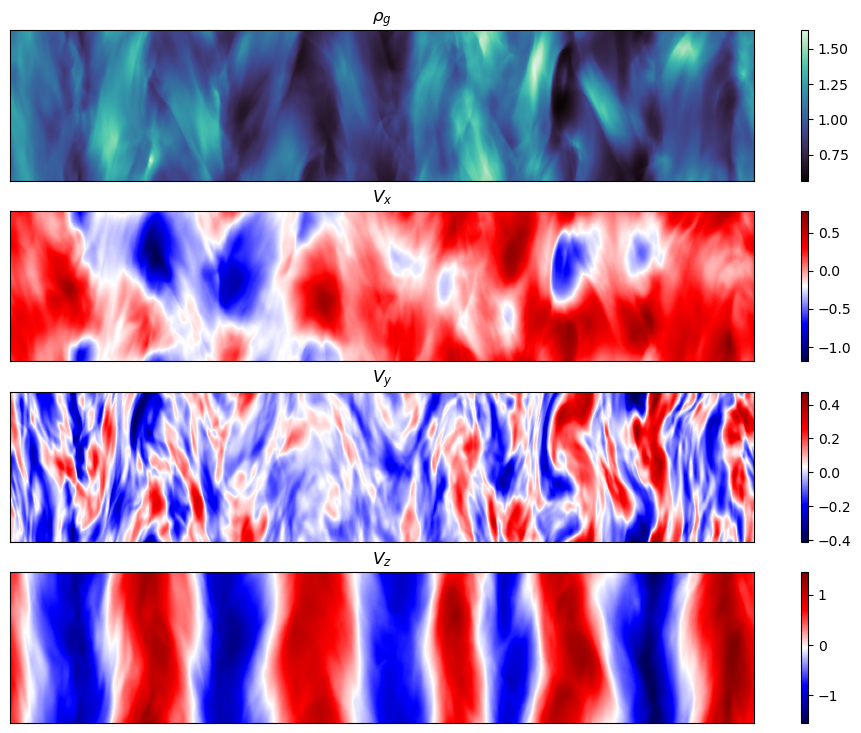

In [250]:
plt.rcParams["figure.figsize"] = (12,9)
fig, axs = plt.subplots(4,1)

#directory = "/Users/haly/science/projects/local_warp/Fairbairn&Stone_gas_only_3D"
directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/FairbairnStone_gas_only_3D"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/FairbairnStone_dust_3D"




snapshot =15
Nx = 1232
Ny = 100
Nz = 128
slice = 10

#read_and_plot_gas_FairbairnStone_3D_slice(directory,Nx,Ny,Nz,slice,snapshot,axs,fig)
read_and_plot_gas_FairbairnStone_3D_integrated_in_y(directory,Nx,Ny,Nz,snapshot,axs,fig)
for i in [0,1,2,3]:
    axs[i].set_xticks([])
    axs[i].set_yticks([])

1.7691766
0.638738751411438
1.9777534
0.5540760159492493
2.042715
0.605476438999176
1.7107128
0.5671109557151794
2.121047
0.6053589582443237
1.9126979
0.588589608669281
1.6605881
0.5558780431747437


(-0.225, 0.2255)

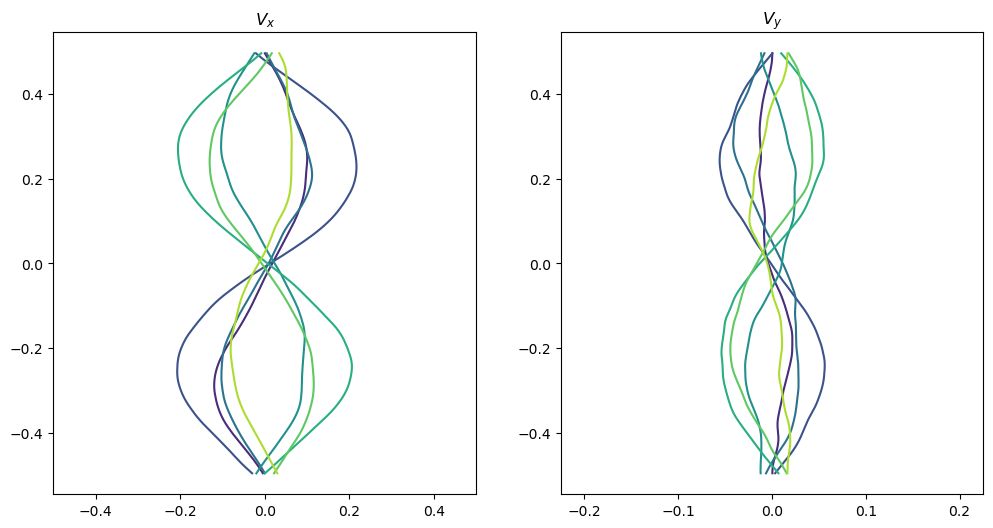

In [190]:
plt.rcParams["figure.figsize"] = (12,6)
fig, axs = plt.subplots(1,2)

#directory = "/Users/haly/science/projects/local_warp/Fairbairn&Stone_gas_only_3D"
directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/FairbairnStone_gas_only_3D"




Nx = 1232
Ny = 100
Nz = 128
slice = 30
colour = sns.color_palette("viridis",7)
snapshot = 251

for i in range(0,7):
    read_and_plot_gas_FairbairnStone_3D_integrated_in_xy(directory,Nx,Ny,Nz,snapshot+i,axs,fig,colour[i])


axs[0].set_xlim(-0.5,0.5)
axs[1].set_xlim(-0.225,0.2255)

In [208]:
plt.rcParams["figure.figsize"] = (12,9)

#directory = "/Users/haly/science/projects/local_warp/Fairbairn&Stone_gas_only_3D"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/FairbairnStone_gas_only_3D"

#directory = "/Users/haly/science/projects/local_warp/shear_3D/zero_gradient"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/zero_gradient"
#directory = "/Users/haly/science/projects/local_warp/shear_3D/non_reflective"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/non_reflective"
#directory = "/Users/haly/science/projects/local_warp/shear_3D/extrapolate"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/extrapolate"
#directory = "/Users/haly/science/projects/local_warp/shear_3D/reverse_periodic"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/reverse_periodic"
#directory = "/Users/haly/science/projects/local_warp/shear_3D/reverse_periodic_shear_corrected"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/reverse_periodic_shear_corrected"
#directory = "/Users/haly/science/projects/local_warp/shear_3D/non_reflective_consistent"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/non_reflective_consistent"

#directory = "/Users/haly/science/projects/local_warp/shear_2D/reverse_periodic"
#directory = "/Users/haly/science/projects/local_warp/shear_2D/reverse_periodic/low_detuning"


directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/fiducial/noDomainDecomposition"



Nx = 4928
Ny = 1
Nz = 512
slice = 1

with plt.ioff():
    for i in range(0,290):
        fig, axs = plt.subplots(4,1)
        im = read_and_plot_dust_FairbairnStone_3D_integrated_in_y(directory,Nx,Ny,Nz,i,axs,fig)
        plt.savefig('new_image_'+"{:04d}".format(i)+".png") 
        plt.close()


0.2
0.20000000298023224
0.30912545
0.12041078507900238
0.417662
0.10650909692049026
0.36712015
0.09442494809627533
0.36452922
0.09157747030258179
0.38415718
0.07966767996549606
0.35535663
0.07352092117071152
0.38663453
0.07654546946287155
0.48715654
0.0822644904255867
0.43310624
0.08188152313232422
5.0430593
0.05263926461338997
8.62846
0.03508017957210541
5.001046
0.02499072067439556
20.275272
0.00493408739566803
18.428484
0.0012264008400961757
13.347136
0.00011368458945071325
43.1533
1.9694591173902154e-05
47.46534
1.4412179325518082e-06
125.23314
3.316711882916934e-08
86.27155
6.464328516919693e-10
88.025116
4.07166578231255e-10
57.90233
6.444640376912503e-09
78.53022
2.0508701681354324e-10
129.52393
1.0645370002171362e-11
163.39055
2.548833756901847e-12
85.17658
1.4550319282768953e-10
120.866615
1.533828619670885e-11
88.249374
1.6694644798531666e-12
108.160774
4.221609607030219e-12
225.52791
9.738685416904244e-14
118.25853
6.376043157434706e-16
99.6026
7.646929591550045e-15
238.5722

TimeoutError: [Errno 60] Operation timed out: '/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/fiducial/noDomainDecomposition/data.0208.vtk'

1.6487368
0.41262874007225037


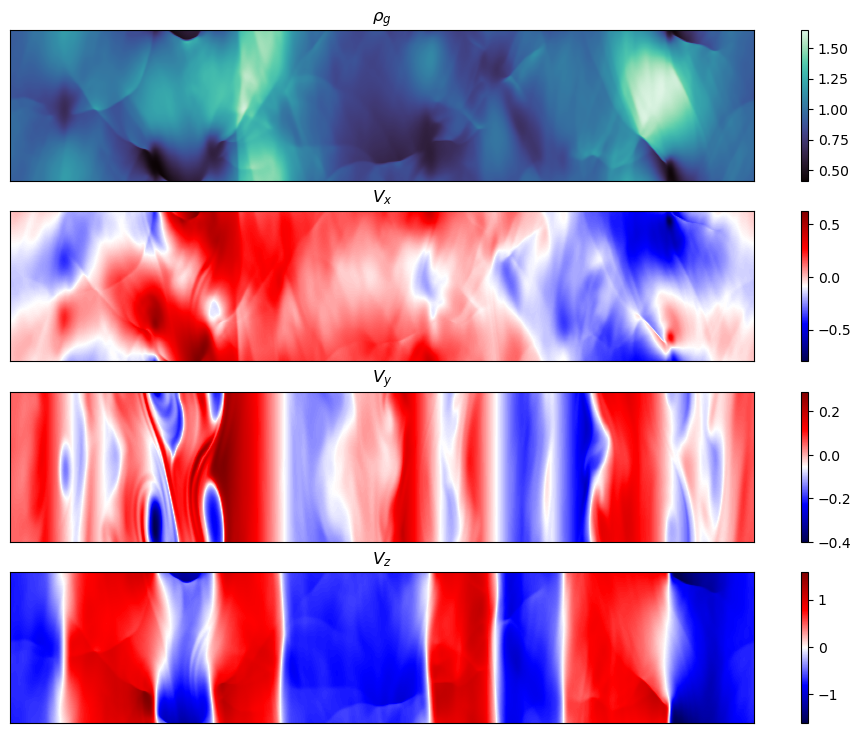

In [227]:
plt.rcParams["figure.figsize"] = (12,9)
fig, axs = plt.subplots(4,1)

directory = "/Users/haly/science/projects/local_warp/Fairbairn&Stone_gas_only_2D"



#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear/dust_f0.2_st1"

snapshot = 499
Nx = 1232
Nz = 128

read_and_plot_gas_FairbairnStone(directory,Nx,Nz,snapshot,axs,fig)
for i in [0,1,2,3]:
    axs[i].set_xticks([])
    axs[i].set_yticks([])

1.3939441
0.6513233184814453


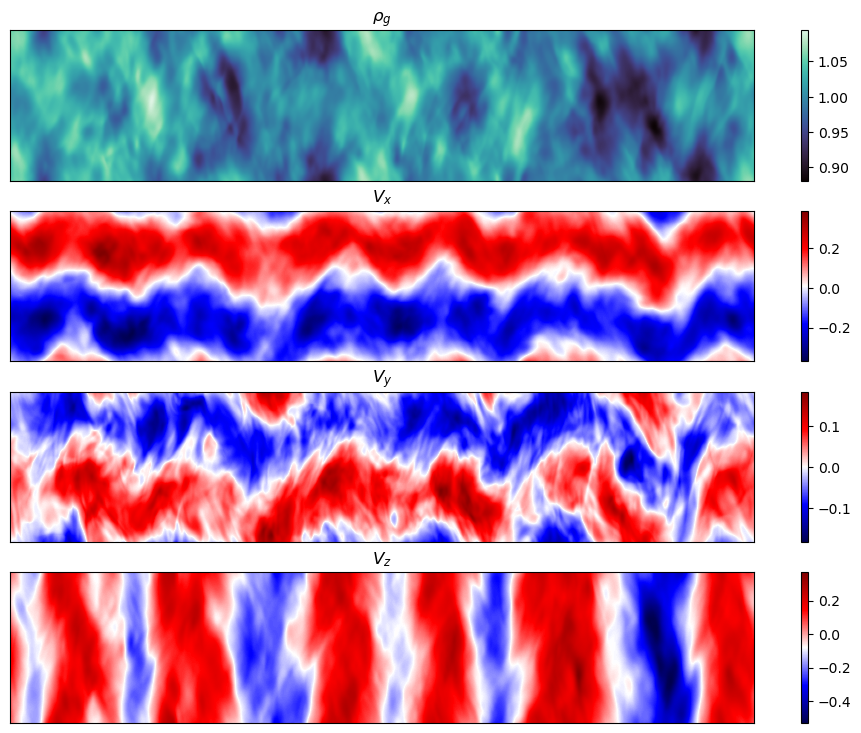

In [252]:
plt.rcParams["figure.figsize"] = (12,9)
fig, axs = plt.subplots(4,1)

#directory = "/Users/haly/science/projects/local_warp/Fairbairn&Stone"


directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/FairbairnStone_dust_3D"

snapshot =1200
Nx = 1232
Ny = 100
Nz = 128
slice = 50

#read_and_plot_dust_FairbairnStone_3D_slice(directory,Nx,Ny,Nz,slice,snapshot,axs,fig)
read_and_plot_gas_FairbairnStone_3D_integrated_in_y(directory,Nx,Ny,Nz,snapshot,axs,fig)
for i in [0,1,2,3]:
    axs[i].set_xticks([])
    axs[i].set_yticks([])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


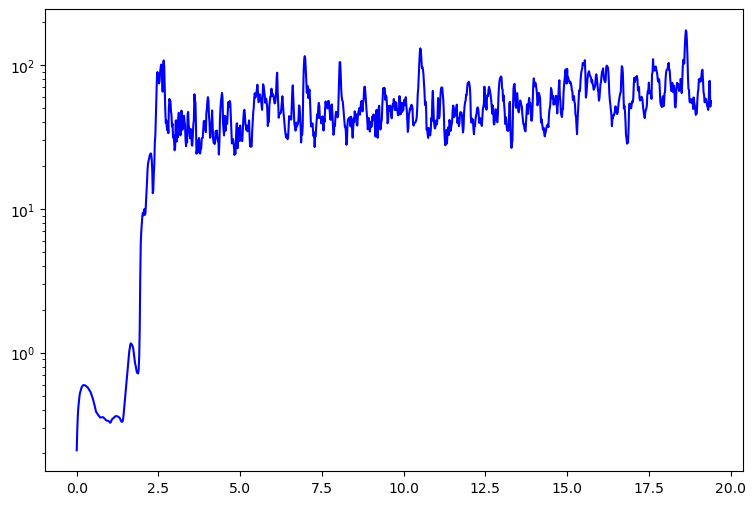

In [135]:
plt.rcParams["figure.figsize"] = (9,6)
fig,ax = plt.subplots(1,1)
directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/FairbairnStone_dust_3D"


time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="blue")




ax.legend( loc='best', frameon=False, fontsize=12)

ax.set_yscale('log')
#ax.set_xlim(0,10)

24.959911
5.608141950830259e-09


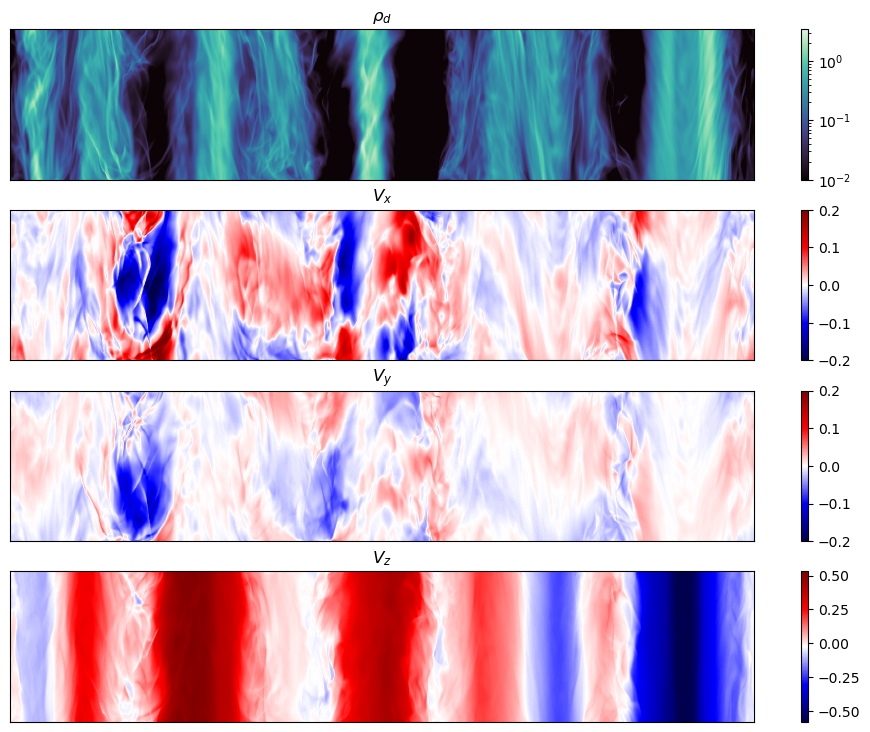

In [76]:
plt.rcParams["figure.figsize"] = (12,9)
fig, axs = plt.subplots(4,1)

#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/non_reflective"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/non_reflective_consistent"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/reverse_periodic"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/reverse_periodic_consistent"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/reverse_periodic_shear_corrected"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/zero_gradient"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/extrapolate"

#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/zero_gradient/low_detuning"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/non_reflective_consistent/low_detuning"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/non_reflective/low_detuning"
directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/reverse_periodic/low_detuning"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/3D"




snapshot = 138
Nx = 1232
Ny = 100
Nz = 128
slice = 50

#read_and_plot_dust_FairbairnStone_3D_slice(directory,Nx,Ny,Nz,slice,snapshot,axs,fig)
read_and_plot_dust_FairbairnStone_3D_integrated_in_y(directory,Nx,Ny,Nz,snapshot,axs,fig)
for i in [0,1,2,3]:
    axs[i].set_xticks([])
    axs[i].set_yticks([])

113.13991
4.409135279104248e-10


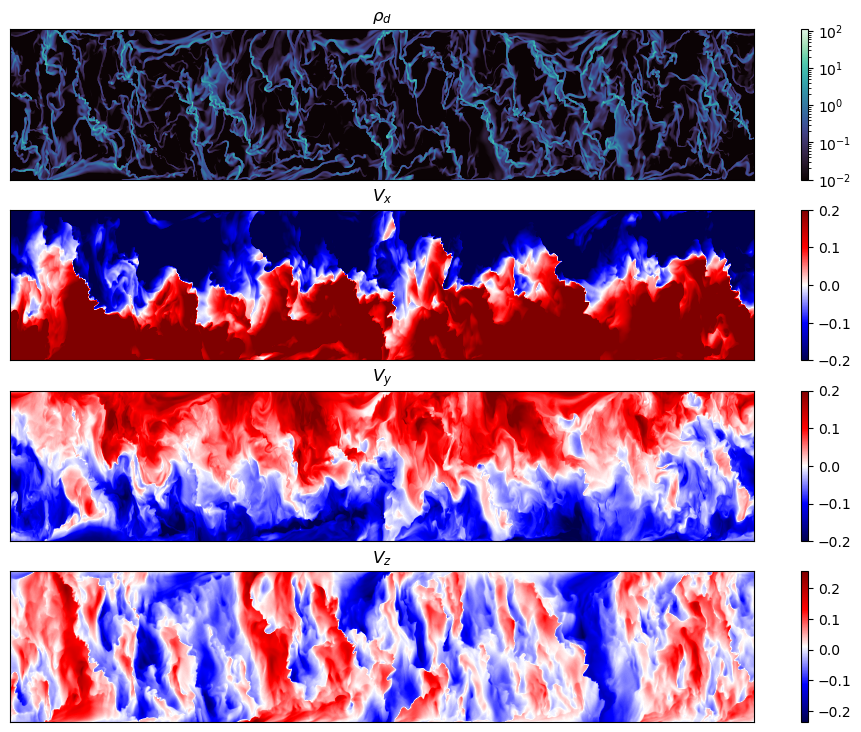

In [207]:
plt.rcParams["figure.figsize"] = (12,9)
fig, axs = plt.subplots(4,1)

#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/non_reflective"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/reverse_periodic"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/zero_gradient"

#directory = "/Users/haly/science/projects/local_warp/shear_3D/zero_gradient"
#directory = "/Users/haly/science/projects/local_warp/shear_3D/non_reflective"
#directory = "/Users/haly/science/projects/local_warp/shear_3D/zero_gradient/low_detuning"
#directory = "/Users/haly/science/projects/local_warp/shear_3D/extrapolate"
#directory = "/Users/haly/science/projects/local_warp/shear_3D/reverse_periodic"
#directory = "/Users/haly/science/projects/local_warp/shear_3D/reverse_periodic_consistent"
#directory = "/Users/haly/science/projects/local_warp/shear_3D/reverse_periodic_shear_corrected"
#directory = "/Users/haly/science/projects/local_warp/shear_3D/non_reflective_consistent"


#directory = "/Users/haly/science/projects/local_warp/shear_2D/reverse_periodic"
#directory = "/Users/haly/science/projects/local_warp/shear_2D/reverse_periodic/high_res_256"
#directory = "/Users/haly/science/projects/local_warp/shear_2D/reverse_periodic/low_detuning"
#directory = "/Users/haly/science/projects/local_warp/shear_2D/reverse_periodic/low_detuning/nz512nx2464"
#directory = "/Users/haly/science/projects/local_warp/shear_2D/reverse_periodic/low_detuning/high_res_256"

#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/fiducial"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/fiducial/newBC"
directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/fiducial/noDomainDecomposition"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/fiducial/nz512nx2464"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/fiducial/nz256nx4928"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/no_feedback"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/kappa0.1"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/psi0.5"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/psi0.02"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/psi0.004"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/psi0.004kappa0.001"
#directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/dust_parameters/st0.01"



snapshot = 200
Nx = 4928
Ny = 1
Nz = 512
slice = 1

#read_and_plot_gas_FairbairnStone_3D_slice(directory,Nx,Ny,Nz,slice,snapshot,axs,fig)
read_and_plot_dust_FairbairnStone_3D_integrated_in_y(directory,Nx,Ny,Nz,snapshot,axs,fig)
for i in [0,1,2,3]:
    axs[i].set_xticks([])
    axs[i].set_yticks([])

(0.0, 30.0)

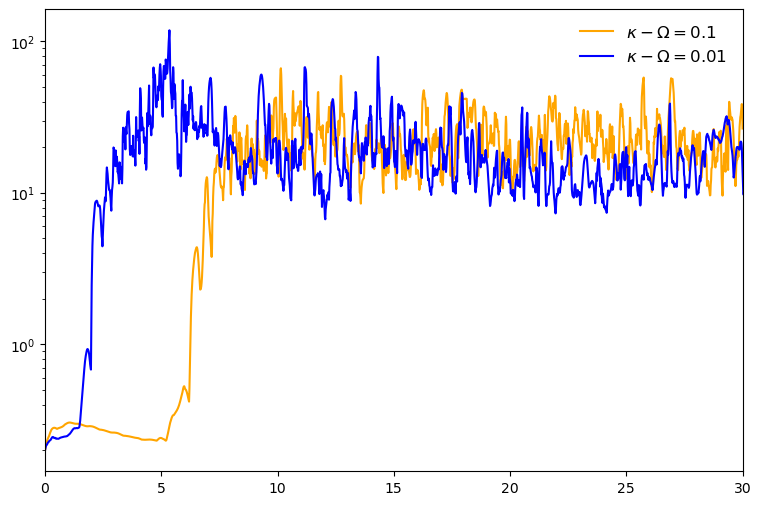

In [711]:
plt.rcParams["figure.figsize"] = (9,6)
fig,ax = plt.subplots(1,1)

directory = "/Users/haly/science/projects/local_warp/shear_3D/non_reflective"
time, dens_dust = read_history(directory+"/timevol.dat")
#ax.plot(np.multiply(time,1./2./pi),dens_dust,color="blue", label="non reflective")



##########################################################################################


directory = "/Users/haly/science/projects/local_warp/shear_3D/zero_gradient"
time, dens_dust = read_history(directory+"/timevol.dat")
#ax.plot(np.multiply(time,1./2./pi),dens_dust,color="orange", label = "zero gradient")



###########################################################################################

directory = "/Users/haly/science/projects/local_warp/shear_3D/extrapolate"
time, dens_dust = read_history(directory+"/timevol.dat")
#ax.plot(np.multiply(time,1./2./pi),dens_dust,color="red", label="extrapolate")



###########################################################################################

directory = "/Users/haly/science/projects/local_warp/shear_3D/reverse_periodic"
time, dens_dust = read_history(directory+"/timevol.dat")
#ax.plot(np.multiply(time,1./2./pi),dens_dust,color="green", label="reverse periodic")

###########################################################################################

directory = "/Users/haly/science/projects/local_warp/shear_3D/reverse_periodic_shear_corrected"
time, dens_dust = read_history(directory+"/timevol.dat")
#ax.plot(np.multiply(time,1./2./pi),dens_dust,color="black", label="reverse periodic corrected")

###########################################################################################


directory = "/Users/haly/science/projects/local_warp/shear_3D/reverse_periodic_consistent"
time, dens_dust = read_history(directory+"/timevol.dat")
#ax.plot(np.multiply(time,1./2./pi),dens_dust,color="cyan", label="reverse periodic consistent")

###########################################################################################


directory = "/Users/haly/science/projects/local_warp/shear_2D/reverse_periodic"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="orange", label=r"$\kappa-\Omega=0.1$")

###########################################################################################


directory = "/Users/haly/science/projects/local_warp/shear_2D/reverse_periodic/low_detuning"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="blue", label=r"$\kappa-\Omega=0.01$")

###########################################################################################


directory = "/Users/haly/science/projects/local_warp/shear_2D/reverse_periodic/high_res_256"
time, dens_dust = read_history(directory+"/timevol.dat")
#ax.plot(np.multiply(time,1./2./pi),dens_dust,color="darkblue", label="2D reverse periodic")


ax.legend( loc='best', frameon=False, fontsize=12)

ax.set_yscale('log')
ax.set_xlim(0,30)

(0.0, 30.0)

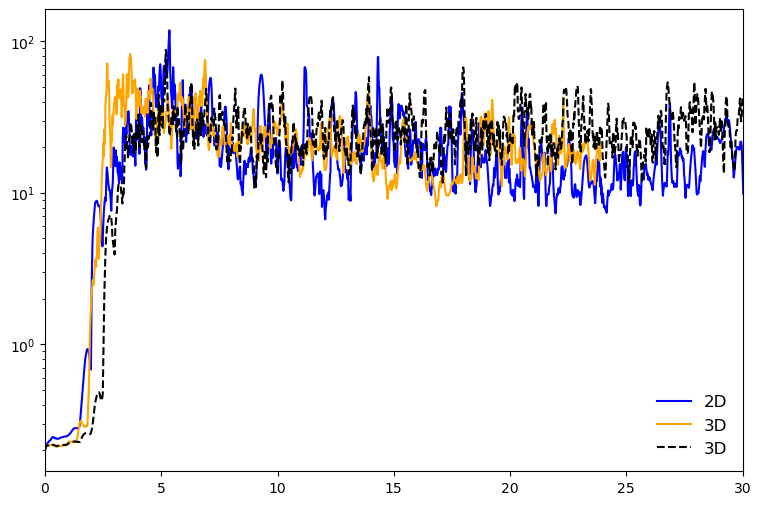

In [138]:
plt.rcParams["figure.figsize"] = (9,6)
fig,ax = plt.subplots(1,1)


directory = "/Users/haly/science/projects/local_warp/shear_2D/reverse_periodic/low_detuning"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="blue", label="2D")

###########################################################################################

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/reverse_periodic/low_detuning"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="orange", label="3D")
###########################################################################################

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/3D"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="black", linestyle="--", label="3D")



ax.legend( loc='best', frameon=False, fontsize=12)

ax.set_yscale('log')
ax.set_xlim(0,30)

(0.0, 30.0)

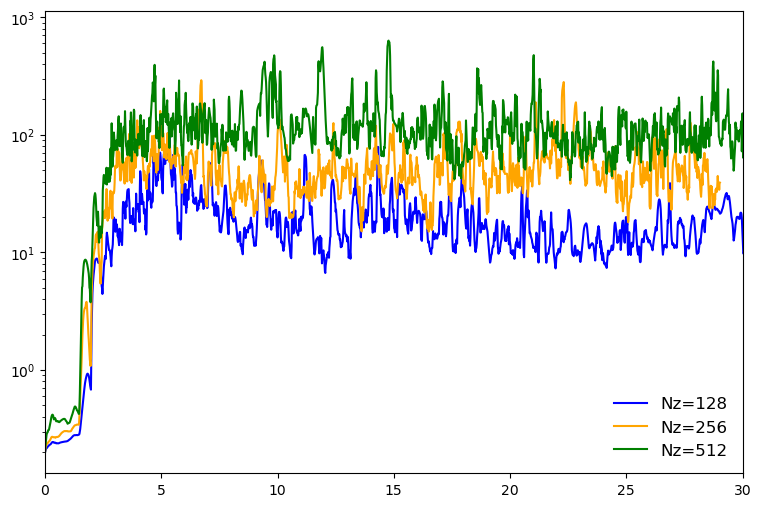

In [92]:
plt.rcParams["figure.figsize"] = (9,6)
fig,ax = plt.subplots(1,1)


directory = "/Users/haly/science/projects/local_warp/shear_2D/reverse_periodic/low_detuning"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="blue", label="Nz=128")

###########################################################################################
directory = "/Users/haly/science/projects/local_warp/shear_2D/reverse_periodic/low_detuning/high_res_256"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="orange", label="Nz=256")



###########################################################################################

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/fiducial/noDomainDecomposition"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="green", label = "Nz=512")



ax.legend( loc='best', frameon=False, fontsize=12)

ax.set_yscale('log')
ax.set_xlim(0,30)

(0.0, 50.0)

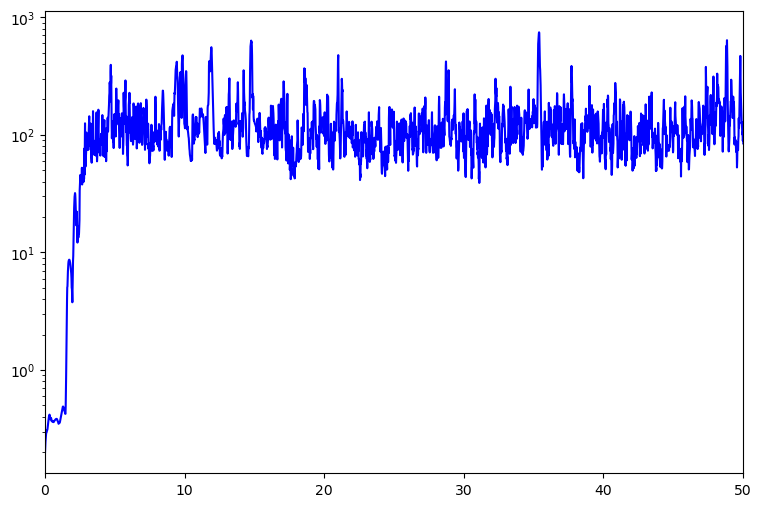

In [210]:
plt.rcParams["figure.figsize"] = (9,6)
fig,ax = plt.subplots(1,1)




###########################################################################################

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/fiducial/noDomainDecomposition"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="blue", label = "Nz=512")




ax.set_yscale('log')
ax.set_xlim(0,50)

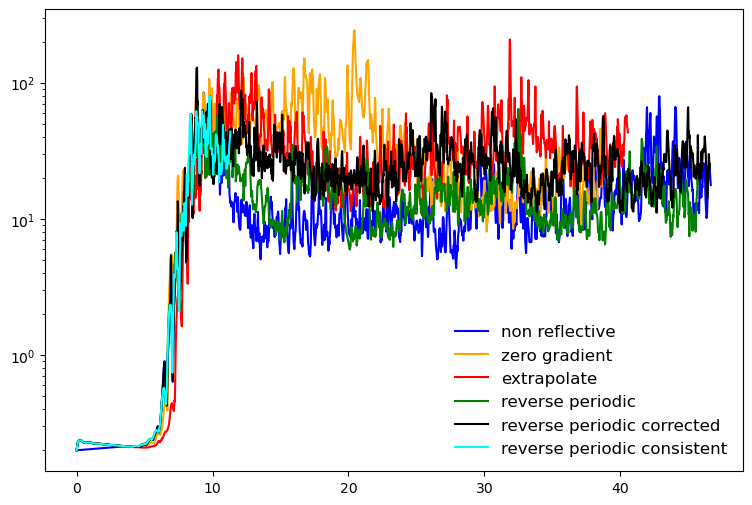

In [597]:
plt.rcParams["figure.figsize"] = (9,6)
fig,ax = plt.subplots(1,1)


directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/non_reflective"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="blue", label = "non reflective")


##########################################################################################


directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/zero_gradient"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="orange", label = "zero gradient")


###########################################################################################

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/extrapolate"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="red", label="extrapolate")

###########################################################################################

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/reverse_periodic"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="green", label="reverse periodic")

###########################################################################################

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/reverse_periodic_shear_corrected"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="black", label="reverse periodic corrected")

###########################################################################################

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/shear_3D/reverse_periodic_consistent"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="cyan", label="reverse periodic consistent")

###########################################################################################

ax.legend( loc='best', frameon=False, fontsize=12)

ax.set_yscale('log')
#ax.set_xlim(0,10)

(0.0, 70.0)

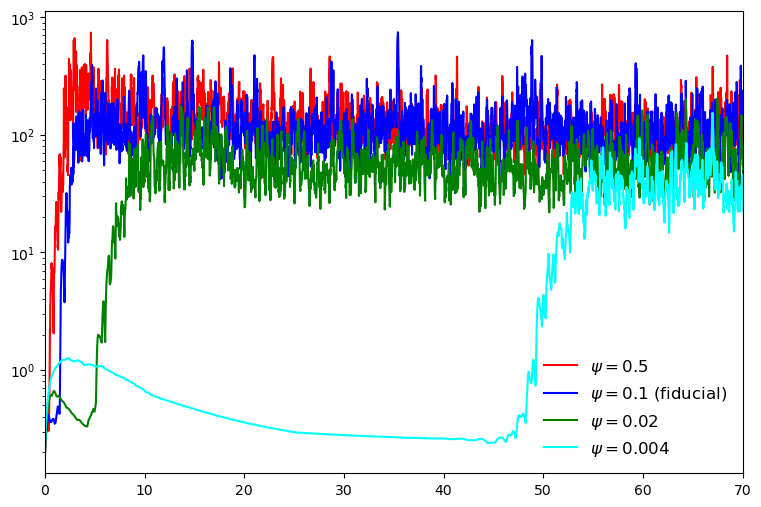

In [199]:
plt.rcParams["figure.figsize"] = (9,6)
fig,ax = plt.subplots(1,1)



directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/kappa0.1"
time, dens_dust = read_history(directory+"/timevol.dat")
#ax.plot(np.multiply(time,1./2./pi),dens_dust,color="orange", label = r"$\kappa-\Omega=0.1$")


###########################################################################################

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/psi0.5"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="red", label=r"$\psi=0.5$")

###########################################################################################
directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/fiducial/noDomainDecomposition"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="blue", label = r"$\psi=0.1$ (fiducial)")


##########################################################################################

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/psi0.02"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="green", label=r"$\psi=0.02$")

###########################################################################################

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/psi0.004"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="cyan", label=r"$\psi=0.004$")

###########################################################################################

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/psi0.004kappa0.001"
time, dens_dust = read_history(directory+"/timevol.dat")
#ax.plot(np.multiply(time,1./2./pi),dens_dust,color="cyan", linestyle= "--",label=r"$\psi=0.004 & \kappa-\Omega=0.001$")


###########################################################################################

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/no_feedback"
time, dens_dust = read_history(directory+"/timevol.dat")
#ax.plot(np.multiply(time,1./2./pi),dens_dust,color="blue", linestyle= "--",label = "no_feedback")


##########################################################################################


ax.legend( loc='best', frameon=False, fontsize=12)

ax.set_yscale('log')
ax.set_xlim(0,70)

(0.0, 50.0)

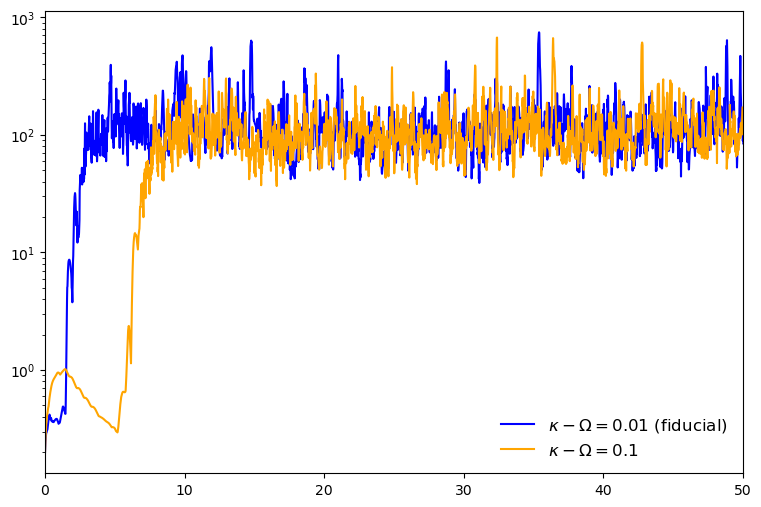

In [191]:
plt.rcParams["figure.figsize"] = (9,6)
fig,ax = plt.subplots(1,1)

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/fiducial/noDomainDecomposition"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="blue", label = r"$\kappa-\Omega=0.01$" + " (fiducial)")

###########################################################################################

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/kappa0.1"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="orange", label = r"$\kappa-\Omega=0.1$")


##########################################################################################


ax.legend( loc='best', frameon=False, fontsize=12)

ax.set_yscale('log')
ax.set_xlim(0,50)

(0.0, 50.0)

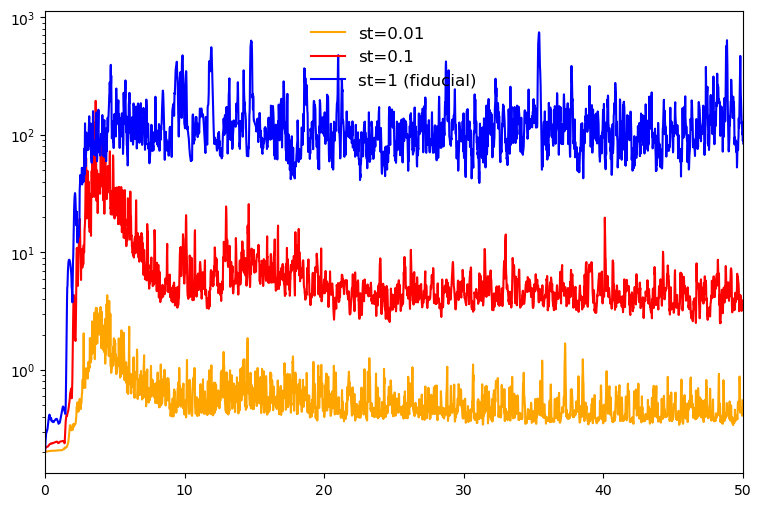

In [190]:
plt.rcParams["figure.figsize"] = (9,6)
fig,ax = plt.subplots(1,1)

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/dust_parameters/st0.01"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="orange", label = "st=0.01")


###########################################################################################


directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/dust_parameters/st0.1"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="red", label = "st=0.1")


###########################################################################################


directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/fiducial/noDomainDecomposition"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="blue", label = "st=1 (fiducial)")




ax.legend( loc='best', frameon=False, fontsize=12)

ax.set_yscale('log')
ax.set_xlim(0,50)

(0.0, 50.0)

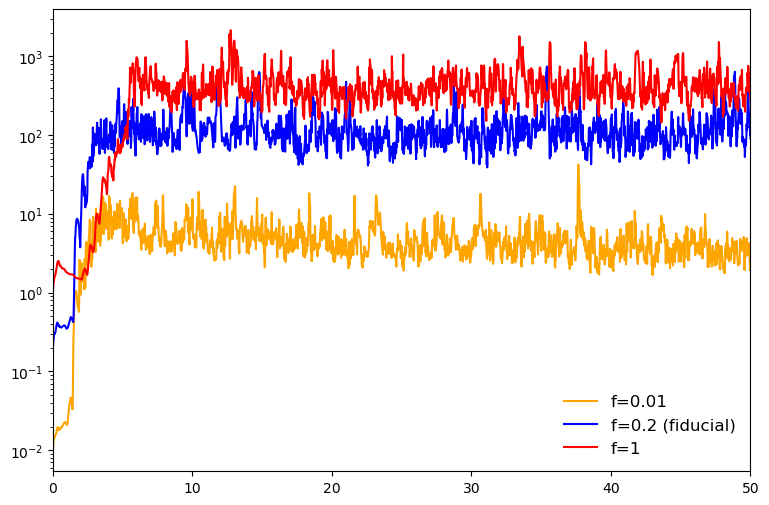

In [189]:
plt.rcParams["figure.figsize"] = (9,6)
fig,ax = plt.subplots(1,1)

directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/dust_parameters/d2g0.01"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="orange", label = "f=0.01")


###########################################################################################


directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/warp_parameters/fiducial/noDomainDecomposition"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="blue", label = "f=0.2 (fiducial)")



###########################################################################################


directory = "/Volumes/staff-umbrella/datahaly/idefix/local_warp/sweep/dust_parameters/d2g1"
time, dens_dust = read_history(directory+"/timevol.dat")
ax.plot(np.multiply(time,1./2./pi),dens_dust,color="red", label = "f=1")





ax.legend( loc='best', frameon=False, fontsize=12)

ax.set_yscale('log')
ax.set_xlim(0,50)